In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
sns.set(context= 'talk',style='ticks',font_scale=1,rc ={'axes.spines.right': False,'axes.spines.top': False,'pdf.fonttype':42},palette='colorblind')

In [5]:
data=pd.read_csv('data/ODin_Data2.txt',sep='\t').iloc[1:,:].astype(int)
data.index=data.index.astype(int)/60
data.index.name='Time (hrs)'
data.columns=['%s%s'%(i,j) for i in 'ABCDEFGH' for j in range(1,9) ]
data

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,...,G7,G8,H1,H2,H3,H4,H5,H6,H7,H8
Time (hrs),,,,,,,,,,,,,,,,,,,,,
0.033333,1611,1624,1612,1611,1606,1610,1600,1617,1587,1599,...,1618,1599,1585,1597,1584,1581,1591,1606,1582,1586
0.700000,1682,1656,1624,1748,1682,1542,1529,1661,1538,1572,...,1616,1586,1451,1442,1432,1477,1471,1506,1456,1415
1.366667,1714,1666,1634,1806,1717,1523,1508,1662,1518,1567,...,1618,1571,1393,1384,1368,1431,1411,1467,1399,1345
2.033333,1726,1673,1644,1842,1742,1527,1509,1656,1513,1564,...,1622,1567,1347,1329,1320,1398,1372,1433,1361,1282
2.700000,1737,1682,1658,1866,1762,1537,1516,1649,1509,1561,...,1631,1562,1327,1303,1293,1391,1356,1422,1346,1249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259.366667,8087,9069,10094,7225,8820,13034,1909,1663,8504,5887,...,1888,1539,7495,7598,7950,9039,9015,8882,1906,1767
260.033333,8084,9064,10090,7225,8819,13035,1906,1665,8501,5888,...,1889,1542,7500,7597,7951,9038,9018,8890,1909,1769
260.700000,8081,9061,10089,7224,8813,13035,1907,1664,8500,5884,...,1888,1540,7496,7592,7946,9029,9010,8888,1907,1767


In [6]:
layout=pd.read_excel('data/ODin_Tube_Map2.xlsx',sheet_name='Layout')
layout=layout.dropna()
layout.index=layout.Position
layout.drop('Position',axis=1,inplace=True)
layout_dict=layout.to_dict()['Condition']
layout_dict

{'A1': 'A1',
 'A2': 'B1',
 'A3': 'C1',
 'A4': 'D1',
 'A5': 'E1',
 'A6': 'F1',
 'A7': 'G1',
 'A8': 'A9',
 'B1': 'A2',
 'B2': 'B2',
 'B3': 'C2',
 'B4': 'D2',
 'B5': 'E2',
 'B6': 'F2',
 'B7': 'G2',
 'B8': 'B9',
 'C1': 'A3',
 'C2': 'B3',
 'C3': 'C3',
 'C4': 'D3',
 'C5': 'E3',
 'C6': 'F3',
 'C7': 'G3',
 'C8': 'C9',
 'D1': 'A4',
 'D2': 'B4',
 'D3': 'C4',
 'D4': 'D4',
 'D5': 'E4',
 'D6': 'F4',
 'D7': 'G4',
 'D8': 'D9',
 'E1': 'A5',
 'E2': 'B5',
 'E3': 'C5',
 'E4': 'D5',
 'E5': 'E5',
 'E6': 'F5',
 'E7': 'G5',
 'E8': 'E9',
 'F1': 'A6',
 'F2': 'B6',
 'F3': 'C6',
 'F4': 'D6',
 'F5': 'E6',
 'F6': 'F6',
 'F7': 'G6',
 'F8': 'F9',
 'G1': 'A7',
 'G2': 'B7',
 'G3': 'C7',
 'G4': 'D7',
 'G5': 'E7',
 'G6': 'F7',
 'G7': 'G7',
 'G8': 'G9',
 'H1': 'A8',
 'H2': 'B8',
 'H3': 'C8',
 'H4': 'D8',
 'H5': 'E8',
 'H6': 'F8',
 'H7': 'G8'}

In [7]:
ODs=pd.read_excel('data/ODin_Tube_Map2.xlsx',sheet_name='ODs',index_col=0)
ODs

,OD1,OD2
Condition,,
A1,0.015,0.368
A2,0.016,0.348
A3,0.012,0.352
A4,0.015,0.356
A5,0.016,0.367
...,...,...
G5,0.006,0.027
G6,0.008,0.031
G7,0.008,0.028


In [8]:
media=pd.read_excel('data/ODin_Tube_Map2.xlsx',sheet_name='Conditions'
                   )
media.index=media.Condition
media_dict=media.Media.to_dict()
media_dict

{'A': '0 mM Nitrite',
 'B': '0.5 mM Nitrite',
 'C': '1 mM Nitrite',
 'D': '2 mM Nitrite',
 'E': '2.5 mM Nitrite',
 'F': '5 mM Nitrite',
 'G': '10 mM Nitrite'}

In [9]:
condition_dict={}
for key in layout_dict:
    item=layout_dict[key]
    if '11' in item or '12' in item:
        cond = media_dict[item[0]] + ',Blank'
    else:
        cond = media_dict[item[0]] + ',Rep%s'%(item[1:])
    condition_dict[key]=cond
condition_dict

{'A1': '0 mM Nitrite,Rep1',
 'A2': '0.5 mM Nitrite,Rep1',
 'A3': '1 mM Nitrite,Rep1',
 'A4': '2 mM Nitrite,Rep1',
 'A5': '2.5 mM Nitrite,Rep1',
 'A6': '5 mM Nitrite,Rep1',
 'A7': '10 mM Nitrite,Rep1',
 'A8': '0 mM Nitrite,Rep9',
 'B1': '0 mM Nitrite,Rep2',
 'B2': '0.5 mM Nitrite,Rep2',
 'B3': '1 mM Nitrite,Rep2',
 'B4': '2 mM Nitrite,Rep2',
 'B5': '2.5 mM Nitrite,Rep2',
 'B6': '5 mM Nitrite,Rep2',
 'B7': '10 mM Nitrite,Rep2',
 'B8': '0.5 mM Nitrite,Rep9',
 'C1': '0 mM Nitrite,Rep3',
 'C2': '0.5 mM Nitrite,Rep3',
 'C3': '1 mM Nitrite,Rep3',
 'C4': '2 mM Nitrite,Rep3',
 'C5': '2.5 mM Nitrite,Rep3',
 'C6': '5 mM Nitrite,Rep3',
 'C7': '10 mM Nitrite,Rep3',
 'C8': '1 mM Nitrite,Rep9',
 'D1': '0 mM Nitrite,Rep4',
 'D2': '0.5 mM Nitrite,Rep4',
 'D3': '1 mM Nitrite,Rep4',
 'D4': '2 mM Nitrite,Rep4',
 'D5': '2.5 mM Nitrite,Rep4',
 'D6': '5 mM Nitrite,Rep4',
 'D7': '10 mM Nitrite,Rep4',
 'D8': '2 mM Nitrite,Rep9',
 'E1': '0 mM Nitrite,Rep5',
 'E2': '0.5 mM Nitrite,Rep5',
 'E3': '1 mM Nitrite,Rep

In [10]:
mapped=data.copy()
mapped=mapped.stack().reset_index()
mapped.columns=['Time (hrs)','Layout','mA']
mapped['Condition']=mapped.Layout.map(condition_dict).fillna('Empty')
mapped

,Time (hrs),Layout,mA,Condition
0,0.033333,A1,1611,"0 mM Nitrite,Rep1"
1,0.033333,A2,1624,"0.5 mM Nitrite,Rep1"
2,0.033333,A3,1612,"1 mM Nitrite,Rep1"
3,0.033333,A4,1611,"2 mM Nitrite,Rep1"
4,0.033333,A5,1606,"2.5 mM Nitrite,Rep1"
...,...,...,...,...
25211,262.033333,H4,9028,"2 mM Nitrite,Rep8"
25212,262.033333,H5,9013,"2.5 mM Nitrite,Rep8"
25213,262.033333,H6,8897,"5 mM Nitrite,Rep8"
25214,262.033333,H7,1910,"10 mM Nitrite,Rep8"


In [11]:
mapped['OD1']=np.nan
mapped['OD2']=np.nan
for i in mapped.index:
    pos = mapped.loc[i,'Layout']
    if pos in layout_dict:
        mapped.loc[i,['OD1','OD2']]=ODs.loc[layout_dict[pos]].values
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2
0,0.033333,A1,1611,"0 mM Nitrite,Rep1",0.015,0.368
1,0.033333,A2,1624,"0.5 mM Nitrite,Rep1",0.017,0.380
2,0.033333,A3,1612,"1 mM Nitrite,Rep1",0.017,0.388
3,0.033333,A4,1611,"2 mM Nitrite,Rep1",0.018,0.434
4,0.033333,A5,1606,"2.5 mM Nitrite,Rep1",0.009,0.460
...,...,...,...,...,...,...
25211,262.033333,H4,9028,"2 mM Nitrite,Rep8",0.010,0.414
25212,262.033333,H5,9013,"2.5 mM Nitrite,Rep8",0.008,0.448
25213,262.033333,H6,8897,"5 mM Nitrite,Rep8",0.008,0.454
25214,262.033333,H7,1910,"10 mM Nitrite,Rep8",0.009,0.032


In [12]:
reps=[]
conds=[]
for i in mapped.Condition:
    j=i.split(',')[0]
    if i != 'Empty':
        i=i.split(',')[1][3:]
    else:
        i=np.nan
    reps.append(i)
    conds.append(j)
mapped['media']=conds
mapped['replicate']=reps
mapped

,Time (hrs),Layout,mA,Condition,OD1,OD2,media,replicate
0,0.033333,A1,1611,"0 mM Nitrite,Rep1",0.015,0.368,0 mM Nitrite,1
1,0.033333,A2,1624,"0.5 mM Nitrite,Rep1",0.017,0.380,0.5 mM Nitrite,1
2,0.033333,A3,1612,"1 mM Nitrite,Rep1",0.017,0.388,1 mM Nitrite,1
3,0.033333,A4,1611,"2 mM Nitrite,Rep1",0.018,0.434,2 mM Nitrite,1
4,0.033333,A5,1606,"2.5 mM Nitrite,Rep1",0.009,0.460,2.5 mM Nitrite,1
...,...,...,...,...,...,...,...,...
25211,262.033333,H4,9028,"2 mM Nitrite,Rep8",0.010,0.414,2 mM Nitrite,8
25212,262.033333,H5,9013,"2.5 mM Nitrite,Rep8",0.008,0.448,2.5 mM Nitrite,8
25213,262.033333,H6,8897,"5 mM Nitrite,Rep8",0.008,0.454,5 mM Nitrite,8
25214,262.033333,H7,1910,"10 mM Nitrite,Rep8",0.009,0.032,10 mM Nitrite,8


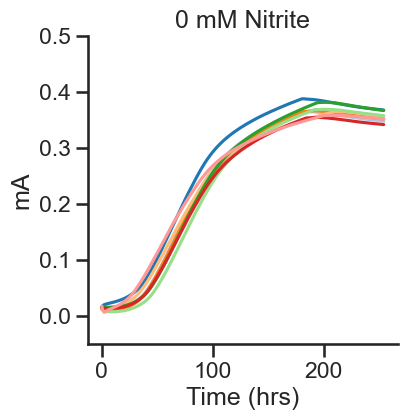

<Figure size 640x480 with 0 Axes>

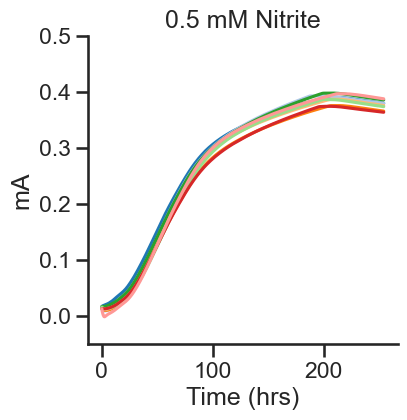

<Figure size 640x480 with 0 Axes>

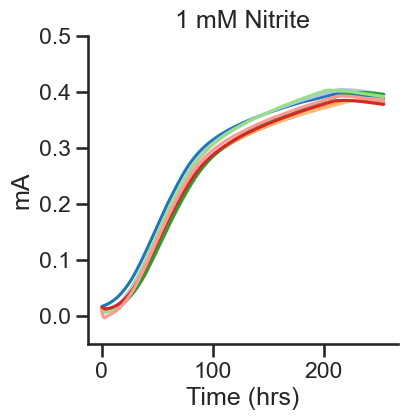

<Figure size 640x480 with 0 Axes>

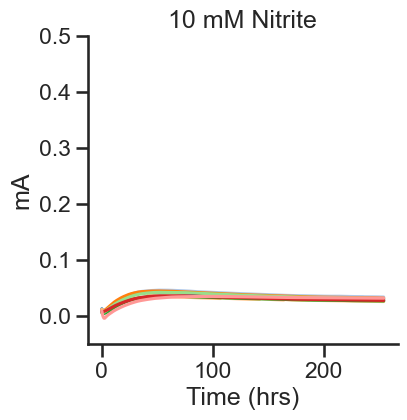

<Figure size 640x480 with 0 Axes>

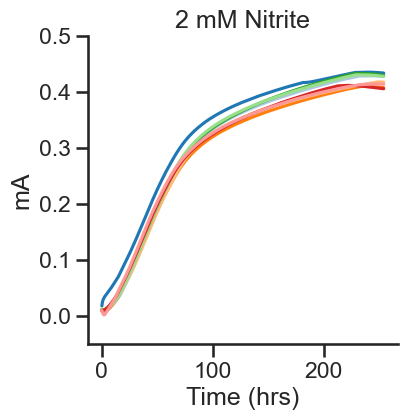

<Figure size 640x480 with 0 Axes>

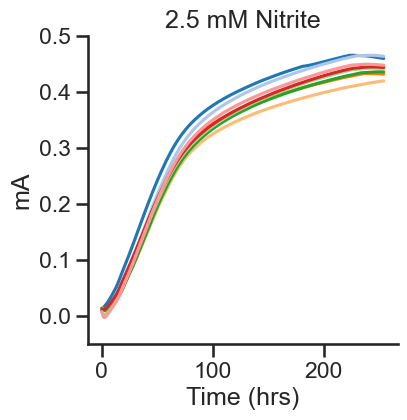

<Figure size 640x480 with 0 Axes>

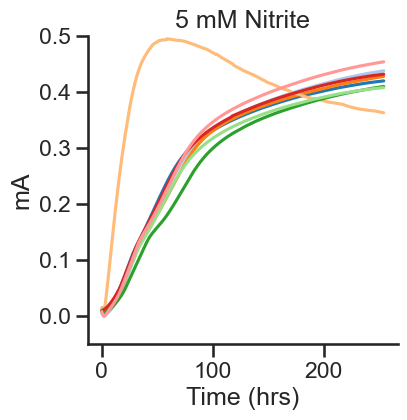

<Figure size 640x480 with 0 Axes>

In [13]:
from scipy.stats import linregress
colors=sns.color_palette('tab20',12)
lags={}
maxOD={}
for media,df in mapped.groupby(by='media'):
    if media =='Empty':
        break
    plt.figure(figsize=(4,4))
    plt.title(media)
    lags[media]=[]
    maxOD[media]=[]
    i=0
  
    for rep,df2 in df.groupby(by='replicate'):
        if rep == '9':
            continue
        df2=df2.loc[:,['Time (hrs)','mA','OD1','OD2']] 
        ewm=df2.ewm(span = 25).mean()
        x=ewm.iloc[[0,-1]]['mA'].values
        y=ewm[['OD1','OD2']].iloc[0].values
        fit = linregress(x,y)
        
        x2=ewm['Time (hrs)'].values
        y2=ewm['mA'].values
        y3=fit.slope*y2+fit.intercept
        if len(x2[y3>.1]) > 0:
            lag=x2[y3>.1][0]
        else:
            lag=x2[-1]
        lags[media].append(lag)
        maxOD[media].append(y3.max())
        #y2=y2/y2.max()
        plt.plot(x2,y3,color=colors[i])
        i+=1
    plt.xlabel('Time (hrs)')
    plt.ylabel('mA')
    plt.ylim(-.05,.5)
    plt.show()
    plt.clf()

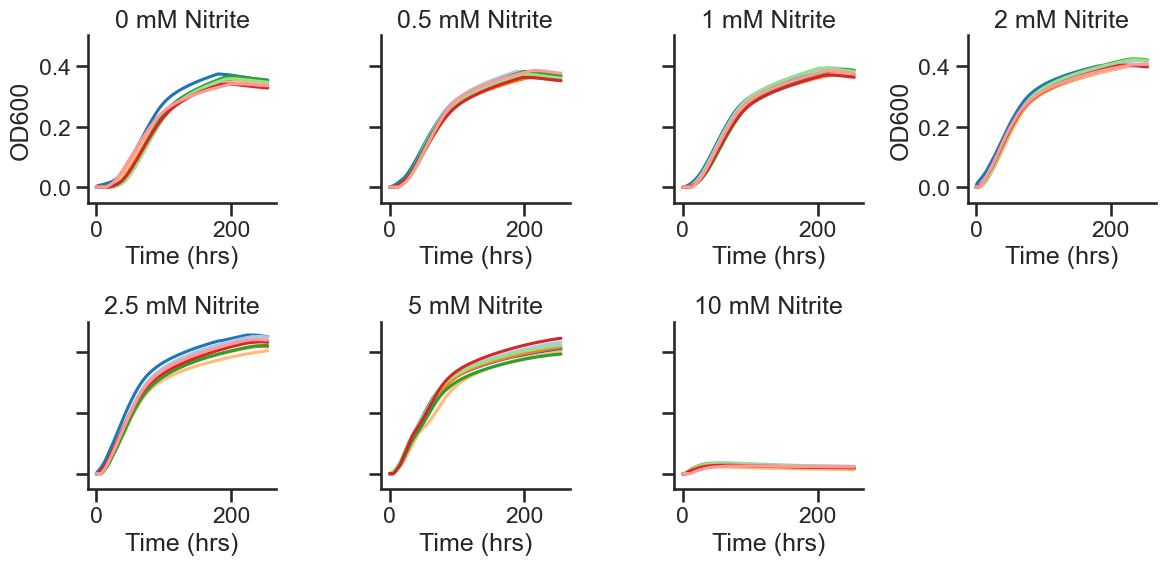

In [14]:
colors=sns.color_palette('tab20',12)
maxOD={}
fig= plt.figure(figsize=(12,6))
trash=[('5 mM Nitrite', '4')]
j=1
res=pd.DataFrame()
for media in ['0 mM Nitrite', '0.5 mM Nitrite', '1 mM Nitrite', '2 mM Nitrite',
       '2.5 mM Nitrite', '5 mM Nitrite', '10 mM Nitrite']:
    df = mapped[mapped.media==media]
    if media =='Empty':
        break
    ax=fig.add_subplot(2,4,j)
    ax.set_title(media)
    lags[media]=[]
    i=0
  
    for rep,df2 in df.groupby(by='replicate'):
        if rep == '9' or (media,rep) in trash:
            continue
        df2=df2.loc[:,['Time (hrs)','mA','OD1','OD2']] 
        ewm=df2.ewm(span = 25).mean()
        x=ewm.iloc[[0,-1]]['mA'].values
        y=ewm[['OD1','OD2']].iloc[0].values
        fit = linregress(x,y)
        
        x2=ewm['Time (hrs)'].values
        y2=ewm['mA'].values
        y3=fit.slope*y2+fit.intercept
        y3=y3-y3[0]
        y3[y3<0]=0.001
        ax.plot(x2,y3,color=colors[i])
        i+=1

     
        od=pd.DataFrame([x2,y3]).T
        od.columns=['Time (hrs)','OD600']
        od['media']=media
        od['replicate']=rep
        res=pd.concat([res,od])
    plt.ylim(-.05,.5)
    if j != 1 and j != 4:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('OD600')
    ax.set_xlabel('Time (hrs)')
    j+=1
    
plt.tight_layout()
#plt.savefig('R12-ODin-OD600.png',dpi=250,bbox_inches='tight')

(-0.01, 0.5)

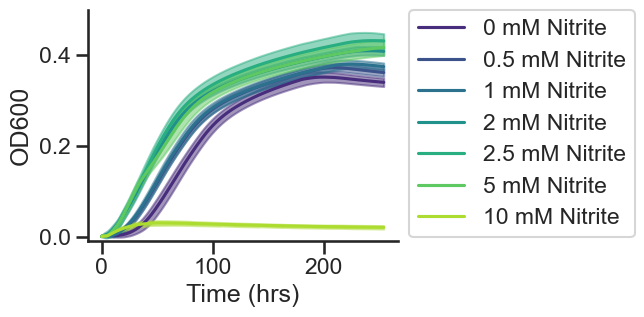

In [15]:
res.replicate=res.replicate.astype(int)
mean=res.groupby(by=['media','Time (hrs)']).mean()
std=res.groupby(by=['media','Time (hrs)']).std()
conditions=['0 mM Nitrite', '0.5 mM Nitrite', '1 mM Nitrite', '2 mM Nitrite',
       '2.5 mM Nitrite', '5 mM Nitrite', '10 mM Nitrite']
colors=sns.color_palette('viridis',7)
plt.figure(figsize=(4,3))
i=0
for idx in conditions:
    
    df=mean.loc[idx].reset_index()
    #df['OD600']=df['OD600']-df['OD600'].min()
    err=std.loc[idx].reset_index()
    plt.plot(df['Time (hrs)'],df['OD600'],label=idx,color=colors[i])
    plt.fill_between(df['Time (hrs)'].values,df['OD600'].values-err['OD600'].values,df['OD600'].values+err['OD600'].values,alpha=0.5,color=colors[i])
   
    i+=1
plt.xlabel('Time (hrs)')
plt.ylabel('OD600')
plt.legend(bbox_to_anchor=(1,1.05),loc=2)

#plt.yscale('log')
#plt.xlim(0,50)
plt.ylim(-.01,0.5)
#plt.yscale('log')
#plt.ylim(10**-3,2*10**-1)
#plt.savefig('R12-NO3+NO2-yield.pdf',bbox_inches='tight')

Text(0.5, 1.0, 'R12')

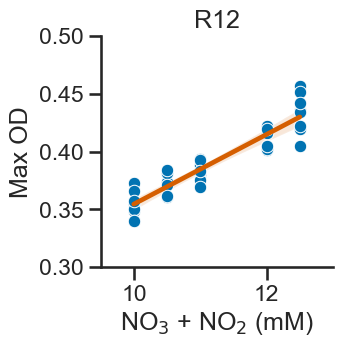

In [16]:
maxod=res[res.media.isin(conditions)].groupby(by=['media','replicate']).max().reset_index()
maxod['nitrite']=[float(x.split()[0])+10 for x in maxod.media]
plt.figure(figsize=(3,3))
sns.regplot(x='nitrite',y='OD600',data=maxod[maxod.nitrite<15],scatter=False,color='r')
sns.scatterplot(x='nitrite',y='OD600',data=maxod[maxod.nitrite<15])
plt.ylim(.3,0.5)
plt.xlim(9.5,13)
plt.xlabel('NO$_3$ + NO$_2$ (mM)')
plt.ylabel('Max OD')
plt.title('R12')
#plt.savefig('R12-NO3+NO2-maxOD-v2.pdf',bbox_inches='tight')